# Convolutional Neural Network

Necessary steps to conduct preprocessing, and then define, train, and test a convolutional neural network model on image data.

## Resources

The below links contain interesting information related to classify the Fashion-MNIST dataset:
* https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a
* https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb
* https://www.kaggle.com/anebzt/fashion-mnist-in-keras
* https://machinelearningmastery.com/how-to-perform-object-detection-with-yolov3-in-keras/
* https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a

* https://github.com/SocieteGenevoiseDonnees/FiltersStylesDomains
* https://towardsdatascience.com/object-detection-using-yolov3-using-keras-80bf35e61ce1
* https://github.com/learncsds/Keras-ML-DL-DeepLizard

## Objects Detection Systems

* [Yolo3](https://pjreddie.com/darknet/yolo/)
* [Faster R CNN](https://towardsdatascience.com/faster-r-cnn-object-detection-implemented-by-keras-for-custom-data-from-googles-open-images-125f62b9141a)

## Platform Environment

Output information regarding the environment running this notebook.

In [5]:
# Debug Environment
import platform
import sys
import cv2
import tensorflow as tf

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print("System", platform.system(), "-", platform.release())
print("Executable", sys.executable)
print("Python", platform.python_version())
print("OpenCV", cv2.__version__)
print("TensorFlow", tf.__version__)
print("Google Colab", IN_COLAB)

System Linux - 3.10.0-1062.18.1.el7.x86_64
Executable /opt/anaconda3.2002/envs/MScAI/bin/python
Python 3.7.7
OpenCV 3.4.2
TensorFlow 2.1.0
Google Colab False


In [6]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Uncomment to not use a GPU for this Notebook

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Num GPUs Available:  1
Default GPU Device:/device:GPU:0


## Sample Example

The data consists of images of clothing.

Now, lets begin by loading some of the required packages:

In [1]:
import numpy as np

import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt

import keras

from keras.utils import to_categorical
# Eithe Keras or Sklearn function can be used for one-hot encodong
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

%matplotlib inline


import warnings                      # Following section is throwing a tone of warnings due to 
warnings.filterwarnings('ignore')    # versions mismatch in current system, therefore ignoring

Using TensorFlow backend.


### Load the Dataset

The two distinct datasets are loaded; one for training and one for testing. These are stored in the corresponding training and testing sets.

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

A dictionary key is defined below with the corresponding class name for each of the integer encoded values in y_train and y_test.

In [3]:
key = {0:"T-shirt/top",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",
       5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle boot"}

## Applying and Training Model

### Datasets

* Exhaustive List: https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research#Object_detection_and_recognition
* ImageNet: http://www.image-net.org/
* Downsampled ImageNet: http://image-net.org/small/download.php
* CIFAR: https://www.cs.toronto.edu/~kriz/cifar.html


### Resources

* https://medium.com/coinmonks/how-to-get-images-from-imagenet-with-python-in-google-colaboratory-aeef5c1c45e5
* https://blog.goodaudience.com/train-a-keras-neural-network-with-imagenet-synsets-in-google-colaboratory-e68dc4fd759f
* https://www.pyimagesearch.com/2016/08/10/imagenet-classification-with-python-and-keras/

### Process

The process to train model from external datasets is to download the dataset and place in corresponding directories before performing the trainng itself.

Another potential solution is to use a pretrained model.

## Transfer Learning

### Load and evaluate a saved model

In [4]:
from numpy import loadtxt
from keras.models import load_model
import zipfile

# Extract zip archive
with zipfile.ZipFile('cats_dogs_tlearn_basic_cnn.h5.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load model
model = load_model('cats_dogs_tlearn_basic_cnn.h5')
model.name = 'cats_dogs_tlearn_basic_cnn'

# Summarize model.
model.summary()

Model: "cats_dogs_tlearn_basic_cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [5]:
# https://towardsdatascience.com/object-detection-using-yolov3-using-keras-80bf35e61ce1

from numpy import expand_dims

from keras.layers.merge import add, concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45

def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size

    # load the image with the required size
    image = load_img(filename, target_size=shape) # convert to numpy array
    image = img_to_array(image)

    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0

    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height


# define our new image
photo_filename = '../tests/cat_04.jpg'

# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (net_w, net_w))

# make prediction
#yolos = model.predict(image)

# summarize the shape of the list of arrays
#print([a.shape for a in yolos])
#draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

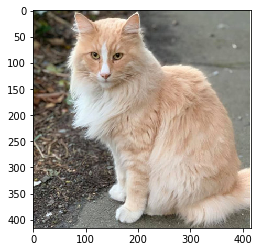

In [7]:
import base64
import numpy as np
import io
from PIL import Image
import keras
from keras import backend as K
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def prepare_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

image = Image.open(photo_filename)
processed_image = prepare_image(image, target_size=(416, 416))

# image = mpimg.imread(photo_filename)
# image = np.dot(image[...,:3], [0.299, 0.587, 0.114])
plt.imshow(image, cmap="gray")
plt.show()

#image.shape

In [8]:
#yolos = model.predict(image)

In [9]:
from yolo3.utils import *
from yolo3.model import *

# Load weights from H5 file via Transfer Learning
!wget https://pjreddie.com/media/files/yolov3.weights -O keras-yolo3/yolov3.weights
!python keras-yolo3/convert.py keras-yolo3/yolov3.cfg keras-yolo3/yolov3.weights keras-yolo3/model_data/yolo.h5

# We need to load our COCO class names
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# YOLO uses anchor boxes - setup our array of common width/heights
anchors = np.array([[ 10,  13],
       [ 16,  30],
       [ 33,  23],
       [ 30,  61],
       [ 62,  45],
       [ 59, 119],
       [116,  90],
       [156, 198],
       [373, 326]])
anchors = np.divide(anchors, 1.0) # convert our int array to float

ModuleNotFoundError: No module named 'yolo3'